In [1]:
#iris데이터 로드
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = iris.iloc[:, :4].values # 독립변수
y = iris.iloc[:, 4].values # 종속변수
print(y[:5])

# 문자열을 label로 변환
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1[:5])

# 원핫인코딩
y2 = pd.get_dummies(y1).values 
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2,
                                                    stratify=y, random_state=10)

In [5]:
#모델 생성
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(4, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


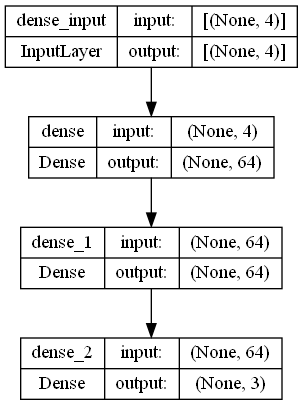

In [7]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [8]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1338 - accuracy: 0.3833
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0174 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9452 - accuracy: 0.5583
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7950 - accuracy: 0.7083
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.8000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.8667
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.7917
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7250
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7833
Epoch 11/100
4/4 [===========

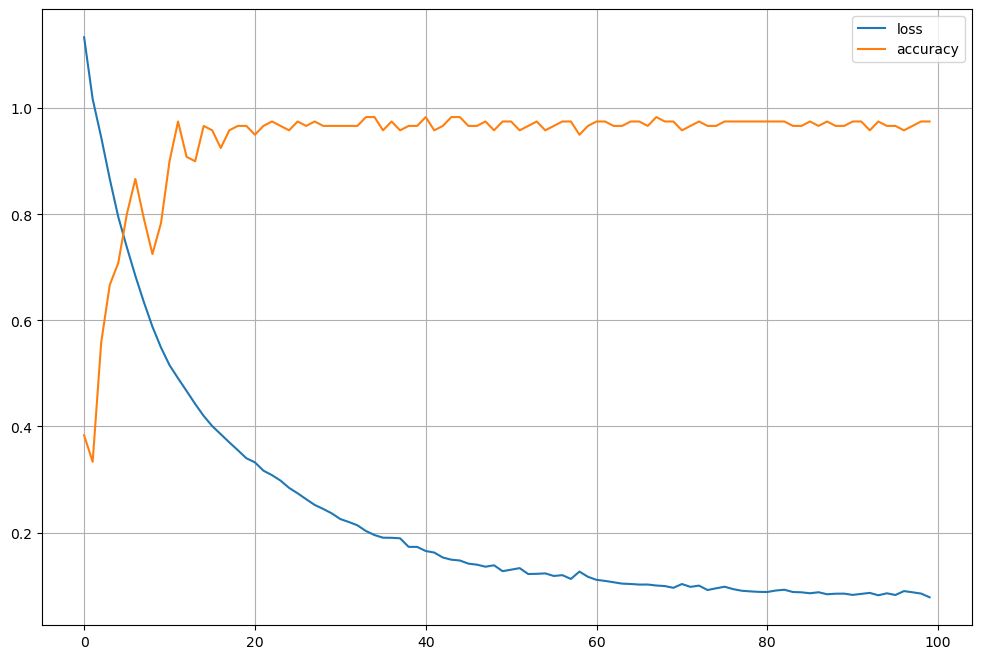

In [9]:
#시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [10]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('정확도: {:.2f}'.format(accuracy))

정확도: 1.00


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
pred_class = np.argmax(pred, axis=1)
confusion_matrix(y_test_class, pred_class)


1/1 [==============================] - 0s 73ms/step


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [12]:
#모델 저장
model.save('c:/data/iris/iris.h5') # 파일 1개로 저장하는 방법
# model.save('c:/data/iris') # 디렉토리로 저장